# Análisis económico de diciembre 2022

## Descarga

In [192]:
#Importar librerías.
import numpy as np
import pandas as pd
from limpiar import columnas_amarillo, columnas_verdes, columnas_fhv, dt_amarillo, dt_verdes, dt_fhv, nulos_amarillo, nulos_verdes, nulos_fhv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [125]:
#Diccionarios
d_amarillo = pd.read_pickle('datos_tlc/tlc_amarillos')
d_verde = pd.read_pickle('datos_tlc/tlc_verdes')
d_fhv = pd.read_pickle('datos_tlc/tlc_fhv')

In [126]:
#Descargar tablas de Diciembre de 2022.
exec(d_amarillo['yellow_2022_13'])
exec(d_verde['green_2022_13'])
exec(d_fhv['fhv_2022_13'])

In [127]:
#Limpiar taxis amarillos.
columnas_amarillo(yellow_2022_13)
dt_amarillo(yellow_2022_13)
nulos_amarillo(yellow_2022_13)

Se eliminaron las columnas: VendorID, RatecodeID store_and_fwd


In [128]:
#Limpiar taxis verdes.
columnas_verdes(green_2022_13)
dt_verdes(green_2022_13)
nulos_verdes(green_2022_13)

Se eliminaron las columnas: VendorID, store_and_fwd_flag, RatecodeID, ehail_fee


'Algo salió mal al tratar valores nulos.'

In [129]:
#Limpiar fhv.
columnas_fhv(fhv_2022_13)
dt_fhv(fhv_2022_13)
nulos_fhv(fhv_2022_13)

Se eliminaron las columnas: hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag


## 1. Tarifa por distancia.

In [130]:
#Tarifa por distancia base sin cargos adicionales.
yellow_2022_13['rate_per_mile'] = yellow_2022_13['fare_amount']/yellow_2022_13['trip_distance']
green_2022_13['rate_per_mile'] = yellow_2022_13['fare_amount']/yellow_2022_13['trip_distance']
fhv_2022_13['rate_per_mile'] = fhv_2022_13['base_passenger_fare']/fhv_2022_13['trip_miles']

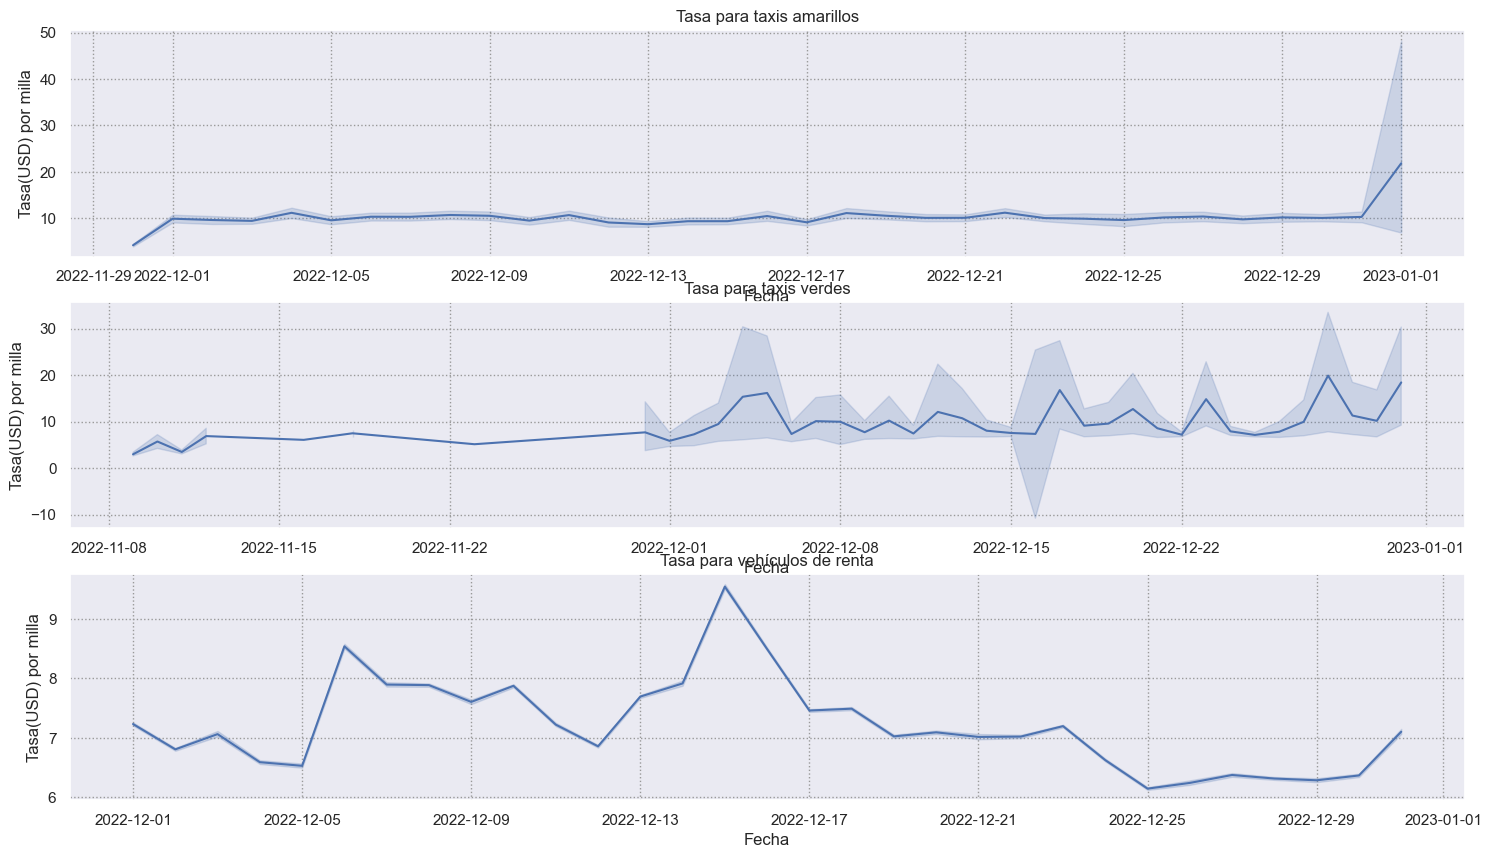

In [131]:
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})

fig, ax = plt.subplots(3, 1, figsize = (18, 10))
sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = yellow_2022_13,
    ax = ax[0],
    markers = True
)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Tasa(USD) por milla')
ax[0].set_title('Tasa para taxis amarillos')

sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = green_2022_13,
    ax = ax[1],
    markers = True
)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Tasa(USD) por milla')
ax[1].set_title('Tasa para taxis verdes')

sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = fhv_2022_13,
    ax = ax[2],
    markers = True
)
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Tasa(USD) por milla')
ax[2].set_title('Tasa para vehículos de renta')

plt.show()

In [132]:
#Tarifa por distancia total.
yellow_2022_13['total_per_mile'] = yellow_2022_13['total_amount']/yellow_2022_13['trip_distance']
green_2022_13['total_per_mile'] = yellow_2022_13['total_amount']/yellow_2022_13['trip_distance']
fhv_2022_13['total_amount'] = fhv_2022_13['base_passenger_fare'] + fhv_2022_13['tolls'] + fhv_2022_13['bcf'] + fhv_2022_13['sales_tax'] + fhv_2022_13['congestion_surcharge'] + fhv_2022_13['airport_fee'] + fhv_2022_13['tips']

In [133]:
fhv_2022_13['total_per_mile'] = fhv_2022_13['total_amount']/fhv_2022_13['trip_miles']

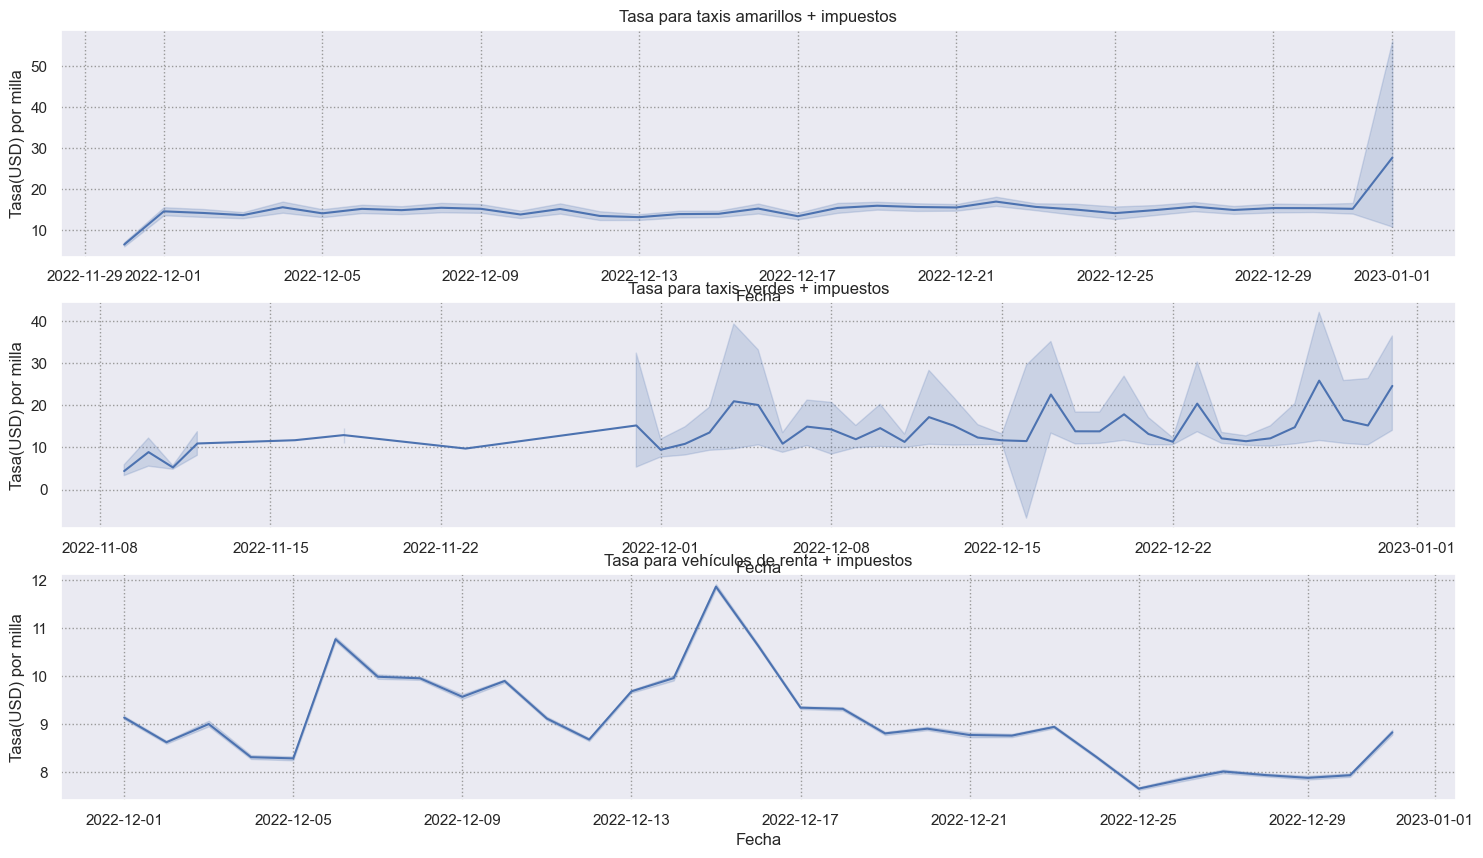

In [134]:
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})

fig, ax = plt.subplots(3, 1, figsize = (18, 10))
sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = yellow_2022_13,
    ax = ax[0],
    markers = True
)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Tasa(USD) por milla')
ax[0].set_title('Tasa para taxis amarillos + impuestos')

sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = green_2022_13,
    ax = ax[1],
    markers = True
)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Tasa(USD) por milla')
ax[1].set_title('Tasa para taxis verdes + impuestos')

sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = fhv_2022_13,
    ax = ax[2],
    markers = True
)
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Tasa(USD) por milla')
ax[2].set_title('Tasa para vehículos de renta + impuestos')

plt.show()

Es mínima la diferencia en la tendencia a primera vista.

## 2. Montos de viajes según origen/destino.

In [135]:
#Leer referencia de ubicación.
zona = pd.read_csv('datos_tlc/taxi_zone_lookup.csv')

In [144]:
#Agregar el dato de Borough a los dataframes para agrupar.

#Amarillos
yellow = yellow_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
yellow.rename(columns = {"Borough":"origin_borough"}, inplace = True)
yellow = yellow.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
yellow.rename(columns = {"Borough":"dest_borough"}, inplace = True)
#Verdes
green = green_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
green.rename(columns = {"Borough":"origin_borough"}, inplace = True)
green = green.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
green.rename(columns = {"Borough":"dest_borough"}, inplace = True)
#Renta
fhv = fhv_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
fhv.rename(columns = {"Borough":"origin_borough"}, inplace = True)
fhv = fhv.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
fhv.rename(columns = {"Borough":"dest_borough"}, inplace = True)

In [145]:
yellow['fare_amount'] = yellow['fare_amount'].abs()
yellow['total_amount'] = yellow['total_amount'].abs()

green['fare_amount'] = green['fare_amount'].abs()
green['total_amount'] = green['total_amount'].abs()

fhv['base_passenger_fare'] = fhv['base_passenger_fare'].abs()
fhv['total_amount'] = fhv['total_amount'].abs()

Según origen

In [156]:
y = yellow[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

In [155]:
g = green[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

In [154]:
f = fhv[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

Text(0.5, 1.0, 'Total promedio por distrito de origen (FHV)')

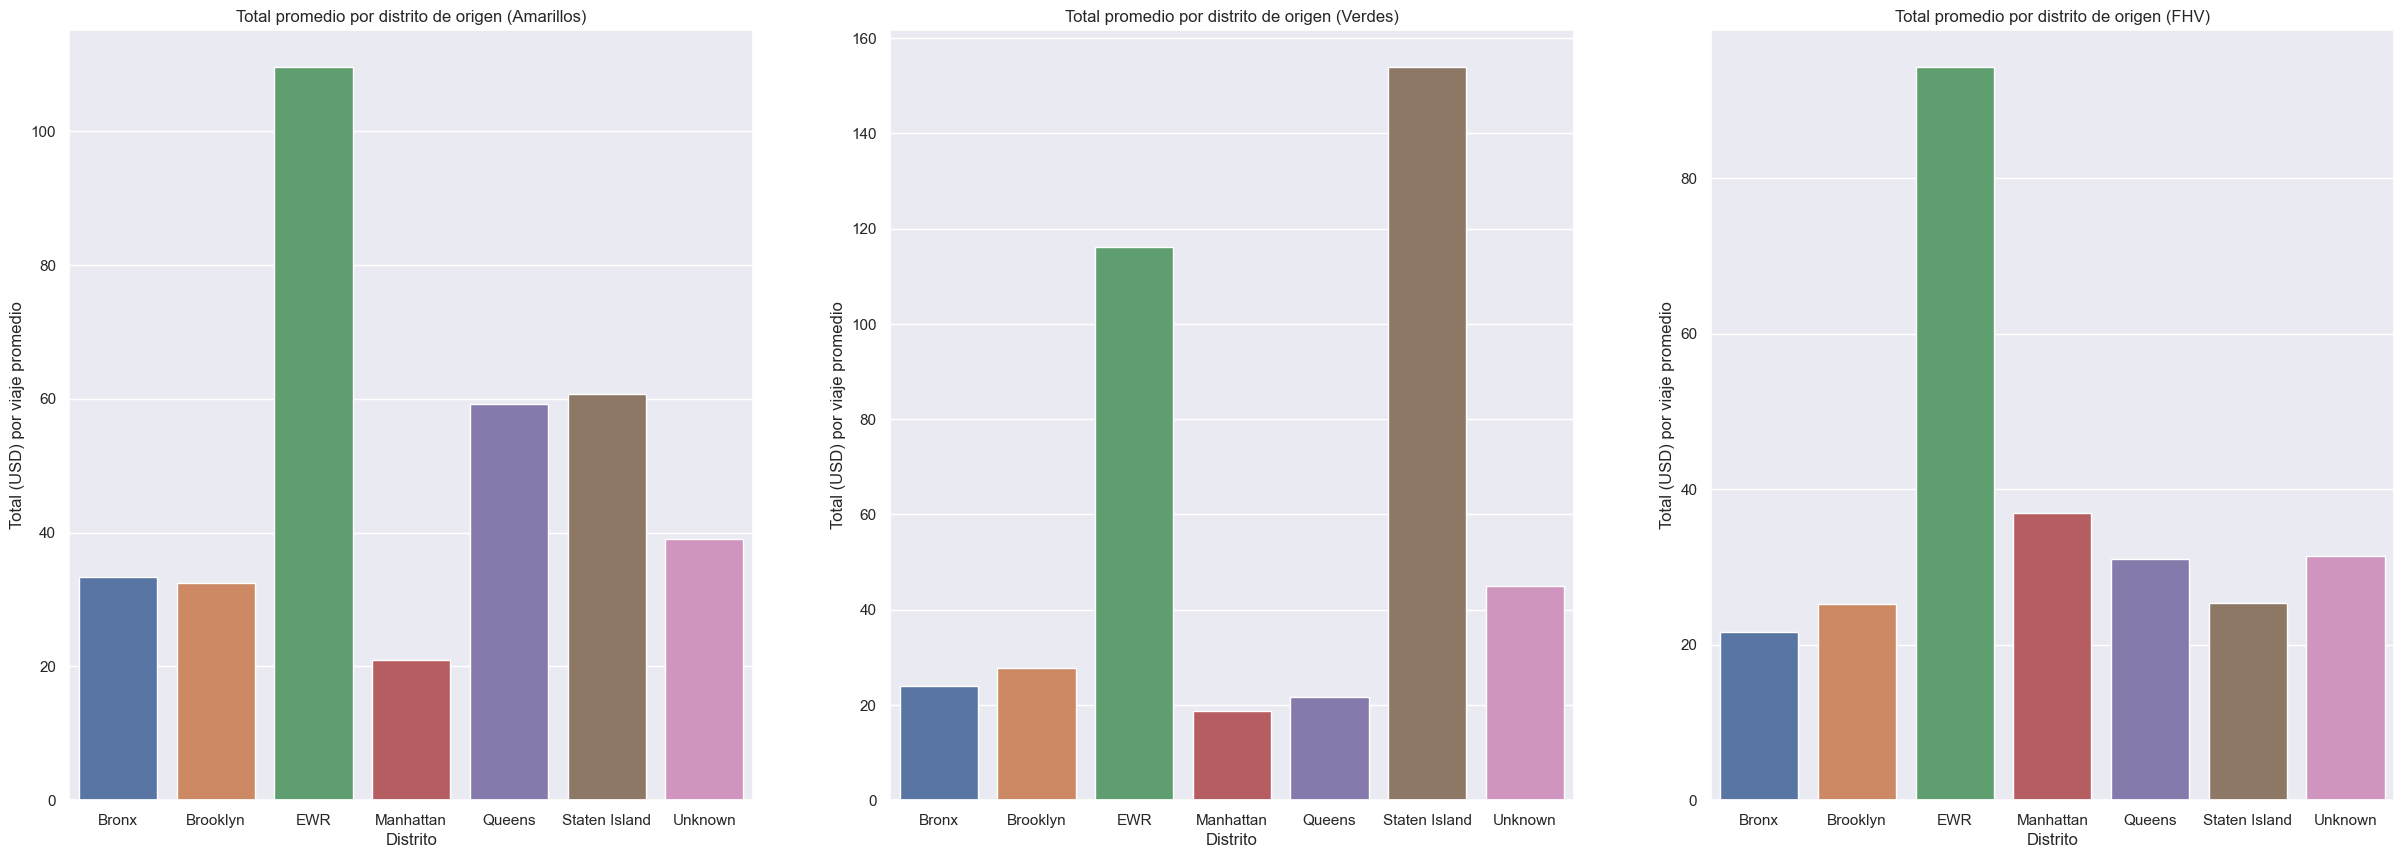

In [170]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.barplot(
    data = y,
    x = y.index,
    y = 'total_amount',
    ax = ax[0]
)
ax[0].set_xlabel('Distrito')
ax[0].set_ylabel('Total (USD) por viaje promedio')
ax[0].set_title('Total promedio por distrito de origen (Amarillos)')

sns.barplot(
    data = g,
    x = y.index,
    y = 'total_amount', 
    ax = ax[1]
)
ax[1].set_xlabel('Distrito')
ax[1].set_ylabel('Total (USD) por viaje promedio')
ax[1].set_title('Total promedio por distrito de origen (Verdes)')

sns.barplot(
    data = f,
    x = y.index,
    y = 'total_amount',
    ax = ax[2]
)
ax[2].set_xlabel('Distrito')
ax[2].set_ylabel('Total (USD) por viaje promedio')
ax[2].set_title('Total promedio por distrito de origen (FHV)')

plt.show()

Según destino

In [171]:
y = yellow[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

In [172]:
g = green[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

In [173]:
f = fhv[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

Text(0.5, 1.0, 'Total promedio por distrito de destino (FHV)')

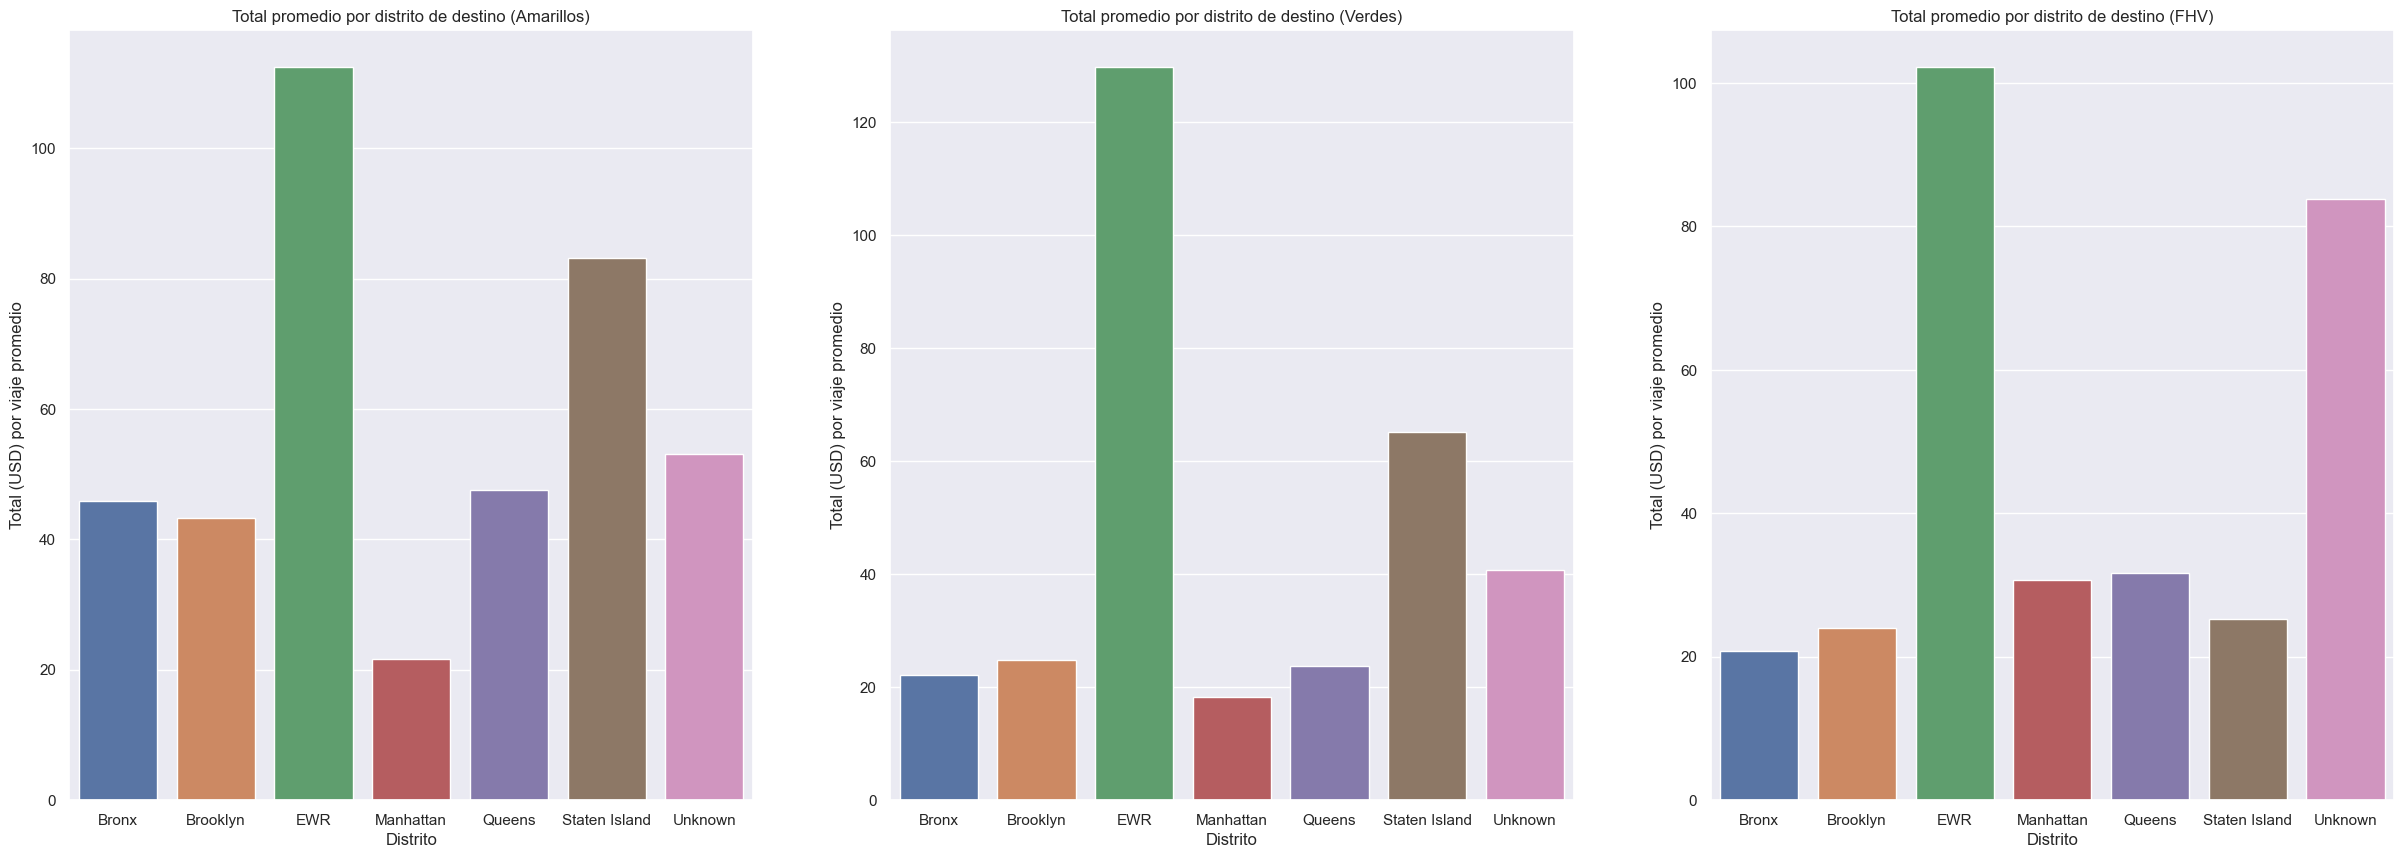

In [174]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.barplot(
    data = y,
    x = y.index,
    y = 'total_amount',
    ax = ax[0]
)
ax[0].set_xlabel('Distrito')
ax[0].set_ylabel('Total (USD) por viaje promedio')
ax[0].set_title('Total promedio por distrito de destino (Amarillos)')

sns.barplot(
    data = g,
    x = y.index,
    y = 'total_amount', 
    ax = ax[1]
)
ax[1].set_xlabel('Distrito')
ax[1].set_ylabel('Total (USD) por viaje promedio')
ax[1].set_title('Total promedio por distrito de destino (Verdes)')

sns.barplot(
    data = f,
    x = y.index,
    y = 'total_amount',
    ax = ax[2]
)
ax[2].set_xlabel('Distrito')
ax[2].set_ylabel('Total (USD) por viaje promedio')
ax[2].set_title('Total promedio por distrito de destino (FHV)')
plt.show()

## 3. Demanda según día de la semana.

In [208]:
yellow_2022_13['pickup_day'] = pd.to_datetime(yellow_2022_13['pickup_day'])
green_2022_13['pickup_day'] = pd.to_datetime(green_2022_13['pickup_day'])
fhv_2022_13['pickup_day'] = pd.to_datetime(fhv_2022_13['pickup_day'])

In [209]:
yellow = yellow_2022_13.set_index('pickup_day')
green = green_2022_13.set_index('pickup_day')
fhv = fhv_2022_13.set_index('pickup_day')

In [213]:
y_por_semana = yellow[['passenger_count']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

g_por_semana = green[['passenger_count']].groupby(green.index.dayofweek).count()
g_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

f_por_semana = fhv[['base_passenger_fare']].groupby(fhv.index.dayofweek).count()
f_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

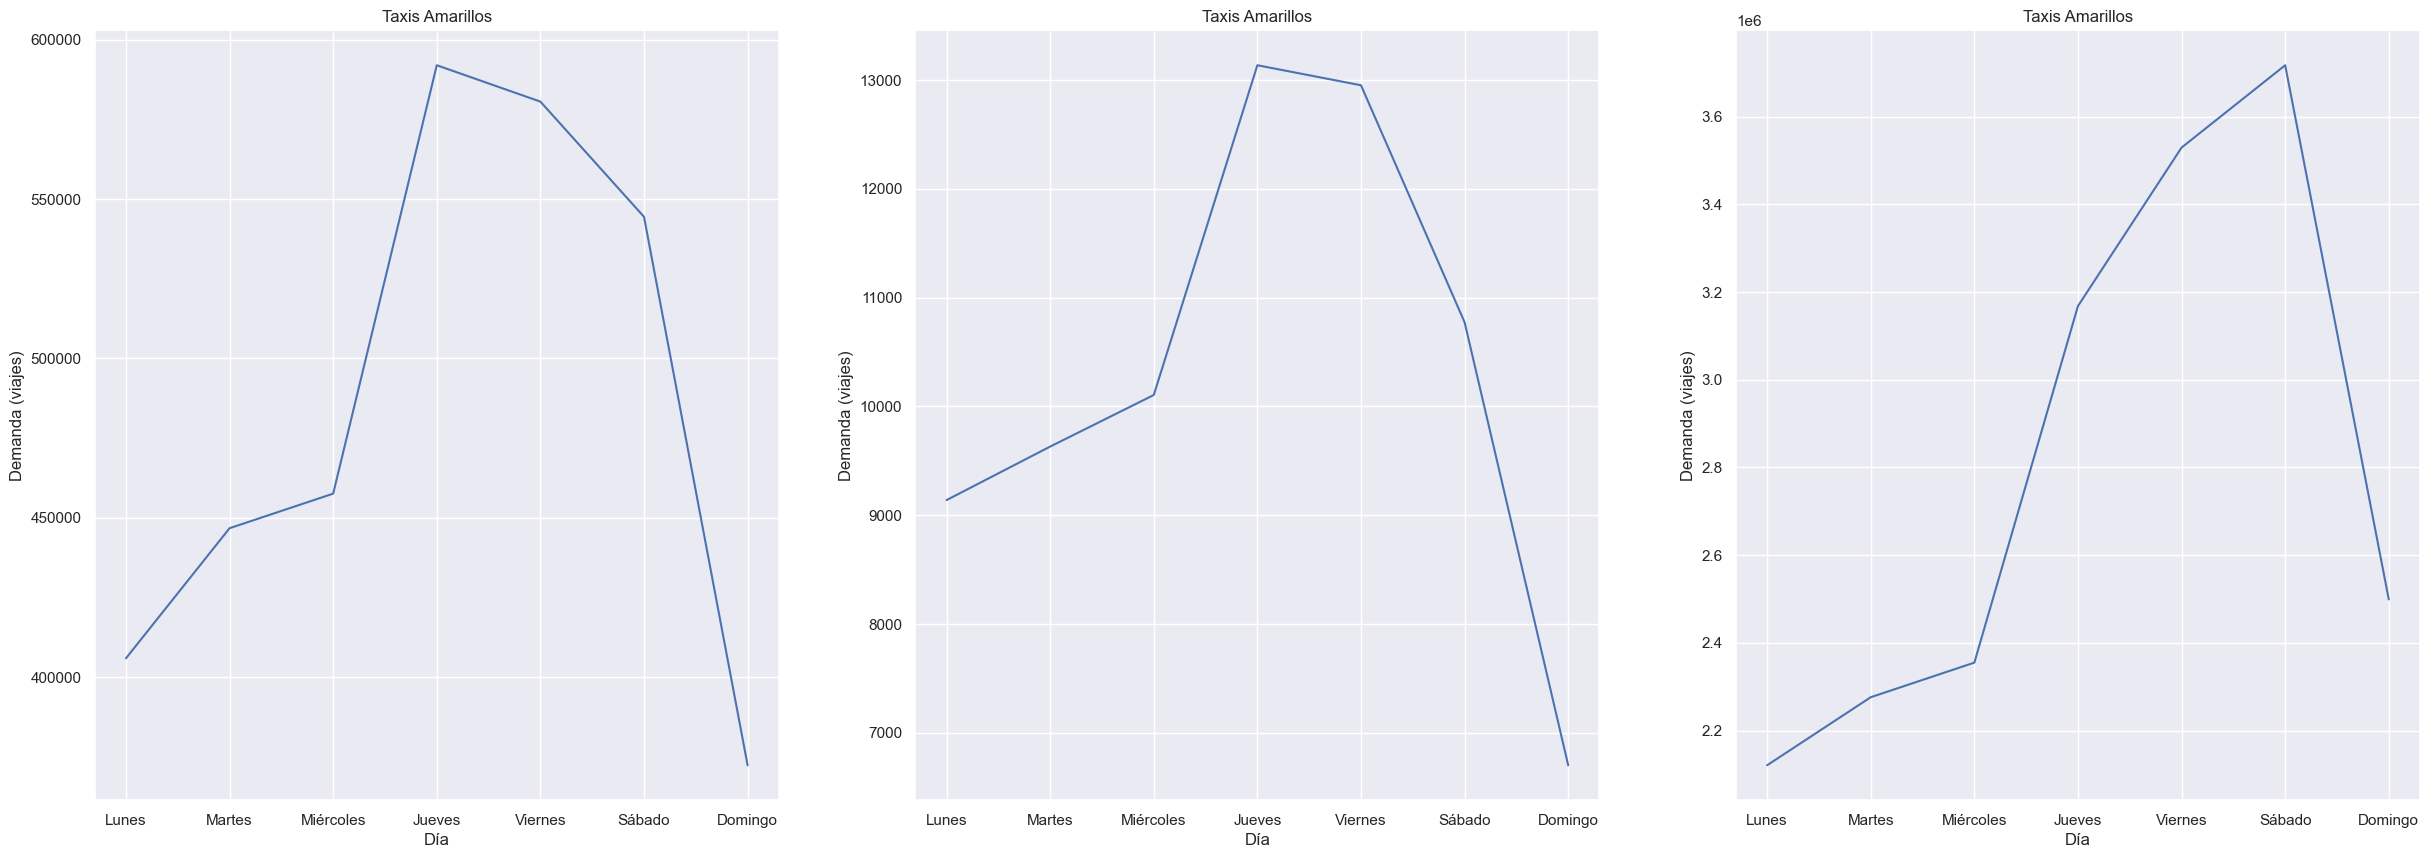

In [217]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.lineplot(
    x = y_por_semana.index,
    y = 'passenger_count',
    data = y_por_semana,
    ax = ax[0]
)
ax[0].set_xlabel('Día')
ax[0].set_ylabel('Demanda (viajes)')
ax[0].set_title('Taxis Amarillos')

sns.lineplot(
    x = g_por_semana.index,
    y = 'passenger_count',
    data = g_por_semana,
    ax = ax[1]
)
ax[1].set_xlabel('Día')
ax[1].set_ylabel('Demanda (viajes)')
ax[1].set_title('Taxis Amarillos')

sns.lineplot(
    x = f_por_semana.index,
    y = 'base_passenger_fare',
    data = f_por_semana,
    ax = ax[2]
)
ax[2].set_xlabel('Día')
ax[2].set_ylabel('Demanda (viajes)')
ax[2].set_title('Taxis Amarillos')

plt.show()

## 4. Costo de viaje según día de la semana.

In [221]:
y_por_semana = yellow[['total_amount']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

g_por_semana = green[['total_amount']].groupby(green.index.dayofweek).count()
g_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

f_por_semana = fhv[['total_amount']].groupby(fhv.index.dayofweek).count()
f_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

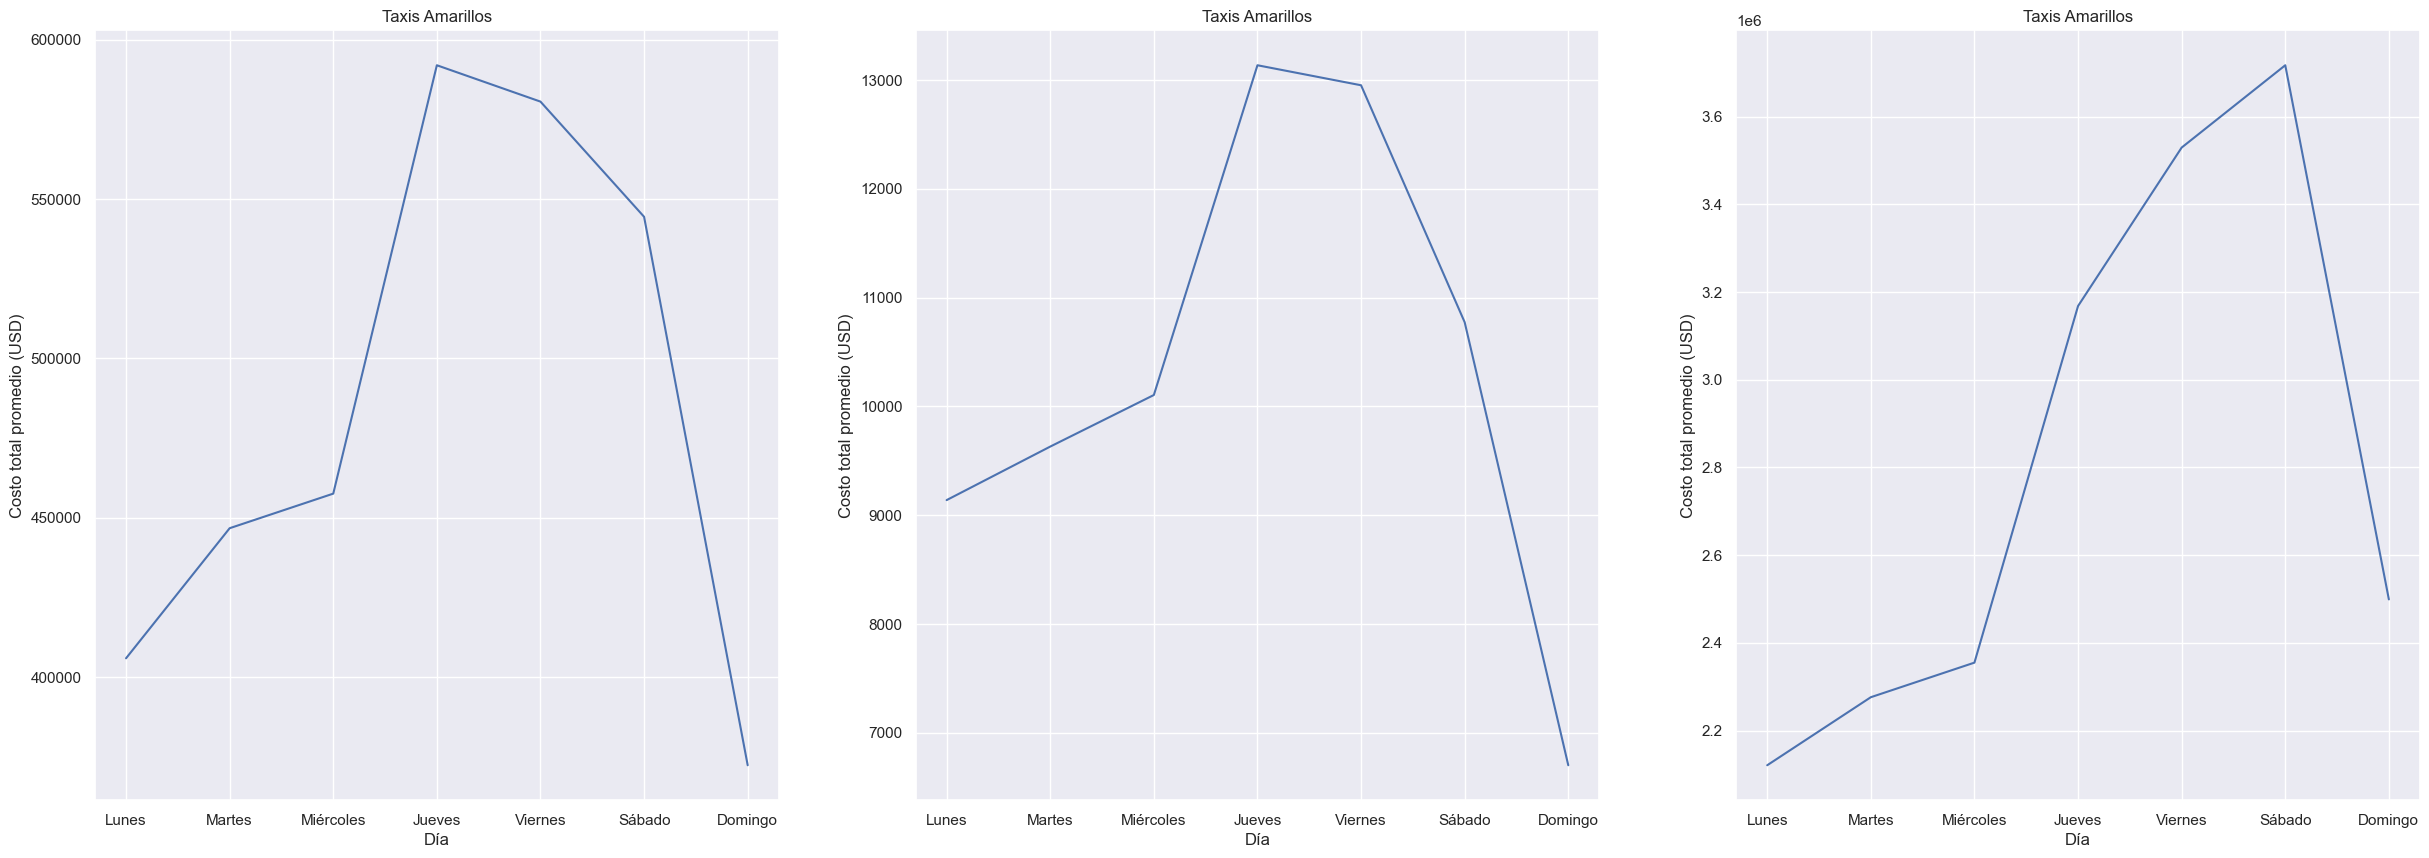

In [223]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.lineplot(
    x = y_por_semana.index,
    y = 'total_amount',
    data = y_por_semana,
    ax = ax[0]
)
ax[0].set_xlabel('Día')
ax[0].set_ylabel('Costo total promedio (USD)')
ax[0].set_title('Taxis Amarillos')

sns.lineplot(
    x = g_por_semana.index,
    y = 'total_amount',
    data = g_por_semana,
    ax = ax[1]
)
ax[1].set_xlabel('Día')
ax[1].set_ylabel('Costo total promedio (USD)')
ax[1].set_title('Taxis Amarillos')

sns.lineplot(
    x = f_por_semana.index,
    y = 'total_amount',
    data = f_por_semana,
    ax = ax[2]
)
ax[2].set_xlabel('Día')
ax[2].set_ylabel('Costo total promedio (USD)')
ax[2].set_title('Taxis Amarillos')

plt.show()

## Matriz de correlación

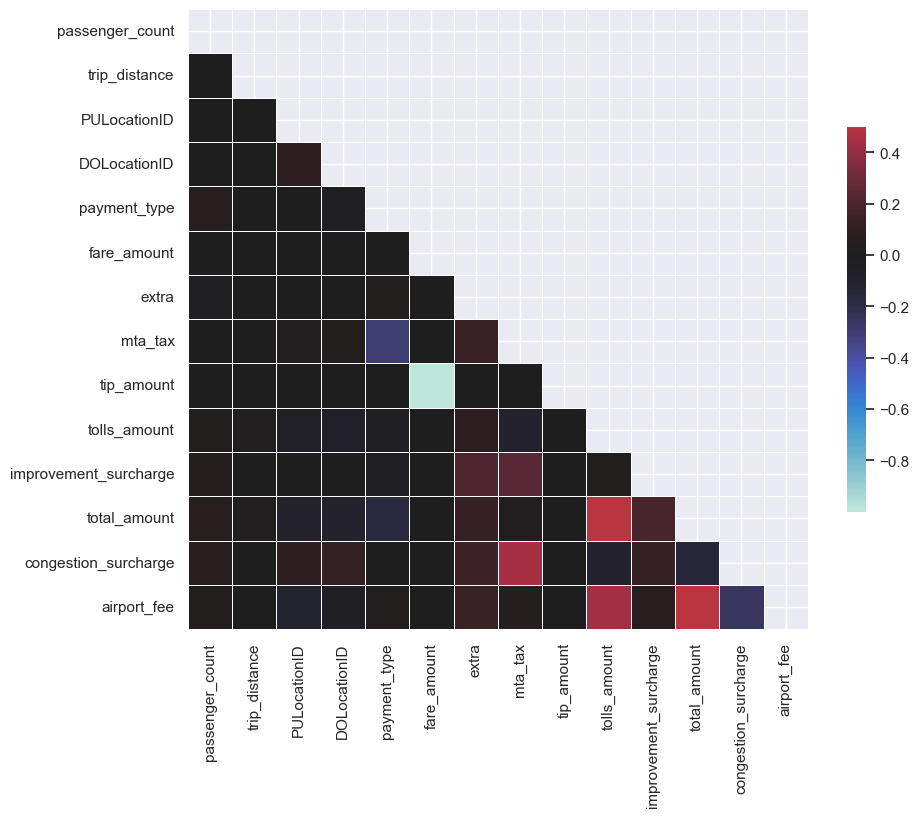

In [139]:
#Correlación taxis amarillos.
sns.set_theme(style = 'darkgrid')

ycorr = yellow_2022_13[['passenger_count',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
]].corr()
mask = np.triu(np.ones_like(ycorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(ycorr, mask = mask, vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Relación inversamente proporcional entre el costo del viaje base (calculado al inicio) y la cantidad de propina dejada por el cliente.
* Las correlaciones más altas (0.4+) las da:
    - Costo total del viaje (total_amount) vs. peajes (tolls_amount).
    - Recargo de congestion (congestion_surcharge) vs. Impuesto MTA.
    - Tasa por aeropuerto vs. peajes.
    - Costo total del viaje vs. Tasa por aeropuerto.


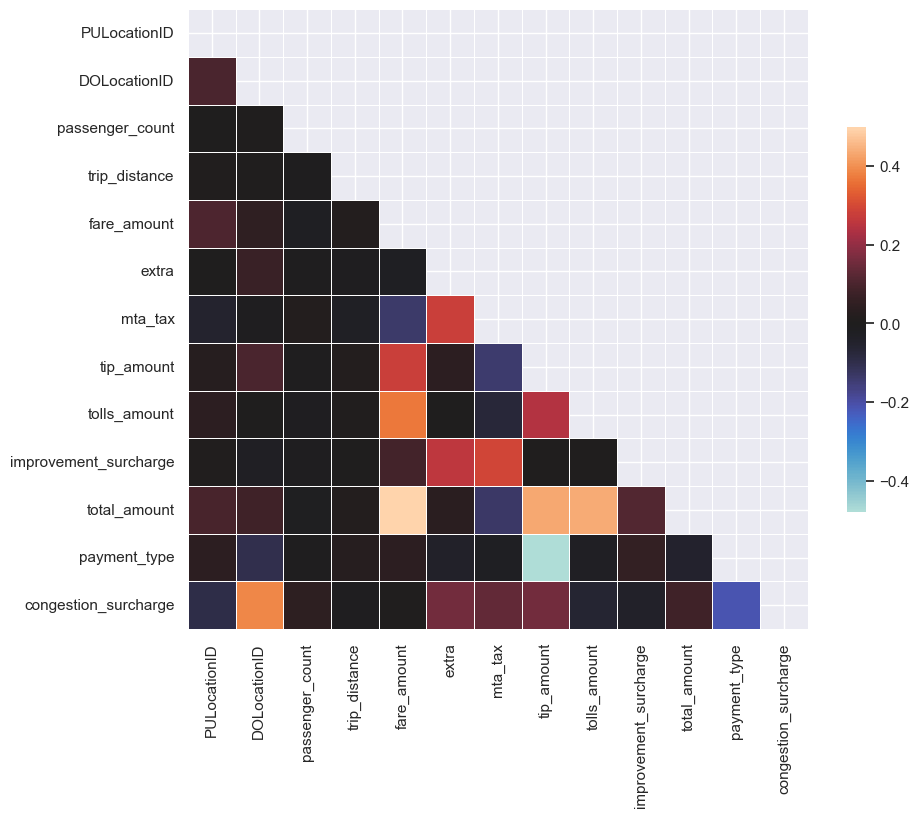

In [140]:
#Correlación taxis verdes.
sns.set_theme(style = 'darkgrid')

gcorr = green_2022_13[['PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'congestion_surcharge',
]].corr()
mask = np.triu(np.ones_like(gcorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(gcorr, mask = mask, vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Relación inversamente proporcional entre tipo de pago y cantidad de propina.
* Las correlaciones más altas las da (0.4+):
    - Zona donde el taxímetro para al final del viaje (DOLocationID) vs. Recargo de congestión.
    - Peaje (tolls_amount) vs. cobro base.
    - Cobro total vs. cantidad de propina.
    - Cobro total vs. Peaje.
    - Cobro total vs. Cobro base.

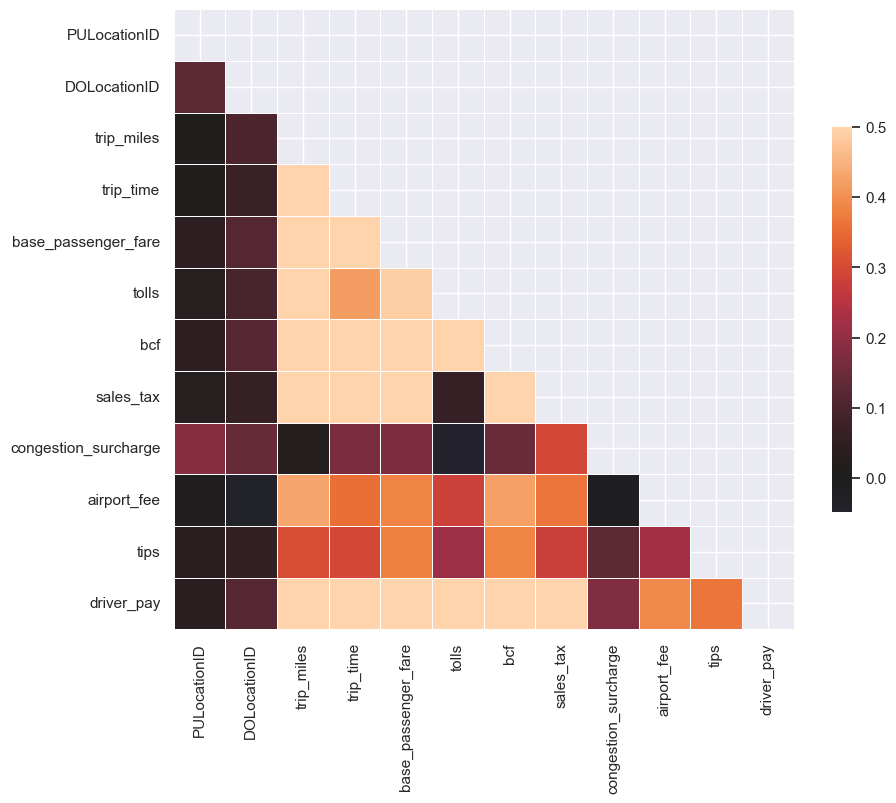

In [141]:
#Correlación vehículos en renta.
sns.set_theme(style = 'darkgrid')

fcorr = fhv_2022_13[['PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay'
 ]].corr()
mask = np.triu(np.ones_like(fcorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(fcorr, mask = mask, vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Correlaciones más altas:
    - Millas de viaje vs. tiempo de viaje.
    - Millas de viaje vs. Cobro base.
    - Millas de viaje vs. peaje.
    - Millas de viaje vs. colecta para Black Car Fund (bcf).
    - Millas de viaje vs. Impuesto de venta (sales_tax).
    - Tiempo de viaje vs. Pago del conductor.
    - Tiempo de viaje vs. Impuesto de venta.
    - Tiempo de viaje vs. colecta para Black Car Fund (bcf).
    - Tiempo de viaje vs. Cobro base.
    - Cobro base vs. pago al conductor.
    - Cobro base vs. impuesto de venta.
    - Cobro base vs. colecta para Black Car Fund (bcf).
    - Cobro base vs. Peaje.
    - Peaje vs. colecta para Black Car Fund (bcf).
    - Peaje vs. pago al conductor.
    - Colecta para Black Car Fund (bcf) vs.
    - Impuesto de venta vs. pago al conductor.

Pago al conductor para vehículos en renta parece ser dependiente o estar relacionado altamente con el tiempo de viaje, el cobro base y el impuesto de venta. A su vez estos estan correlacionados con otros factores.